<a href="https://colab.research.google.com/github/tigureis/Notes_and_exercises_on_Data_Structuring/blob/main/Plot_and_Mutual_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
import plotly.express as px
import missingno as msno


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Extract the Title from 'Name'

In [ ]:
df['personal_title']=df.Name.str.extract('.+?, (.*?)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Name            891 non-null    object 
 3   Sex             891 non-null    object 
 4   Age             714 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           204 non-null    object 
 10  Embarked        889 non-null    object 
 11  personal_title  891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


Create a copy of the DF and Drop the some variables

In [ ]:
df_cat = df.copy()
df_cat.drop_duplicates()
df_cat.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)
df.head()
df_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


Select the remaining `float`

In [ ]:
categorical_columns = df_cat.select_dtypes(exclude='number').columns
df_cat[categorical_columns] = df_cat[categorical_columns].astype('category')

Use OrdinalEncoder to convert to numerical

In [ ]:
{col: dict( enumerate(df_cat[col].cat.categories) ) for col in categorical_columns}
df_cat[categorical_columns] = df_cat[categorical_columns].apply(lambda x: x.cat.codes)

In [ ]:
df_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,11
2,1,1,0,38.0,1,0,71.2833,0,12
3,1,3,0,26.0,0,0,7.9250,2,8
4,1,1,0,35.0,1,0,53.1000,2,12
5,0,3,1,35.0,0,0,8.0500,2,11


Get some visual information with `boxplot`

<Axes: xlabel='Survived', ylabel='personal_title'>

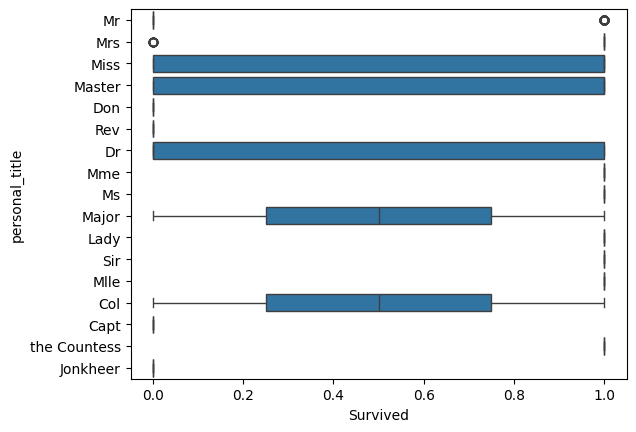

In [ ]:
sns.boxplot(data=df, x='Survived', y='personal_title')

Use `heatmap` to check for correlations

<Axes: >

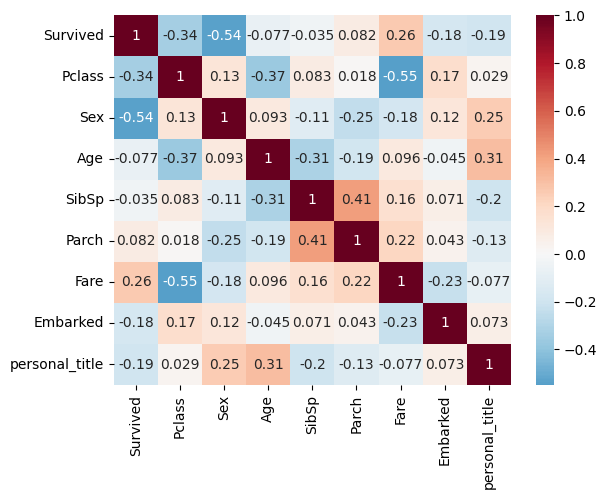

In [ ]:
sns.heatmap(df_cat.corr(), cmap = 'RdBu_r', center=0, annot=True)

# [Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

---



First, check if the database is ready for use. (in this case, just check for missing values)

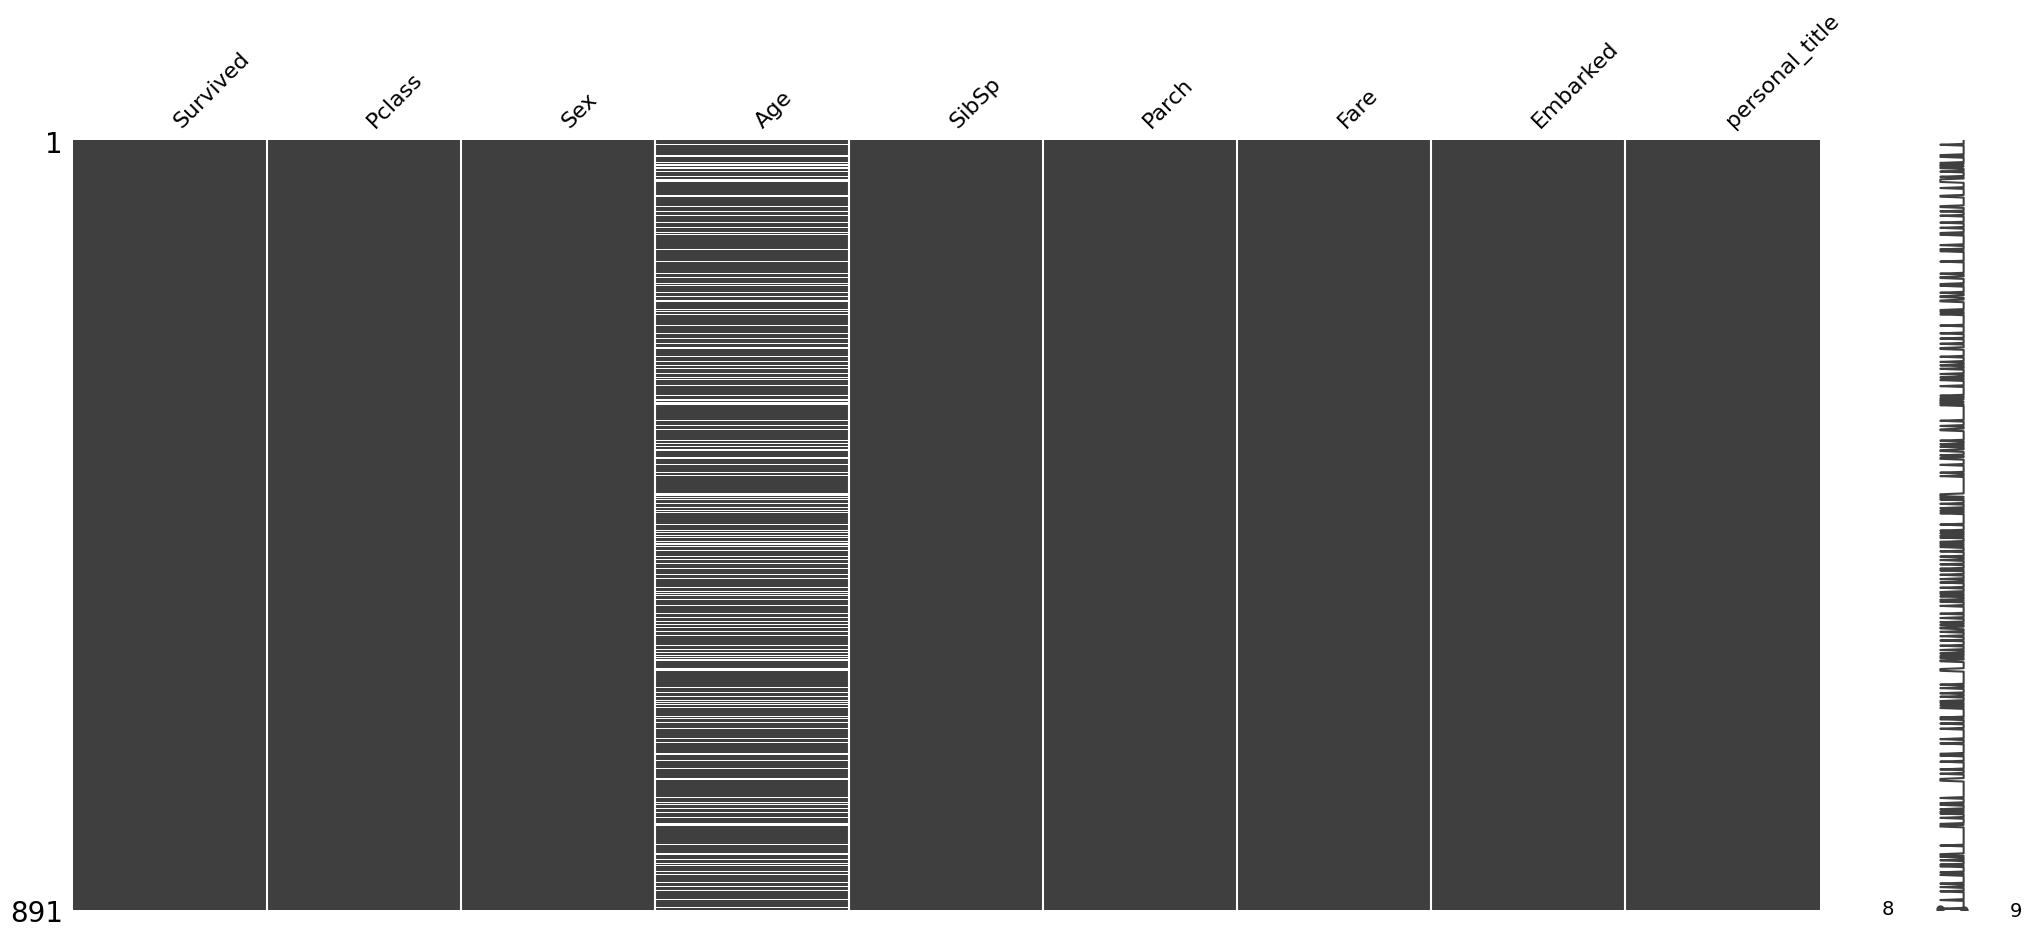

In [ ]:
msno.matrix(df_cat);

Since the missing data is just on age, simply drop it

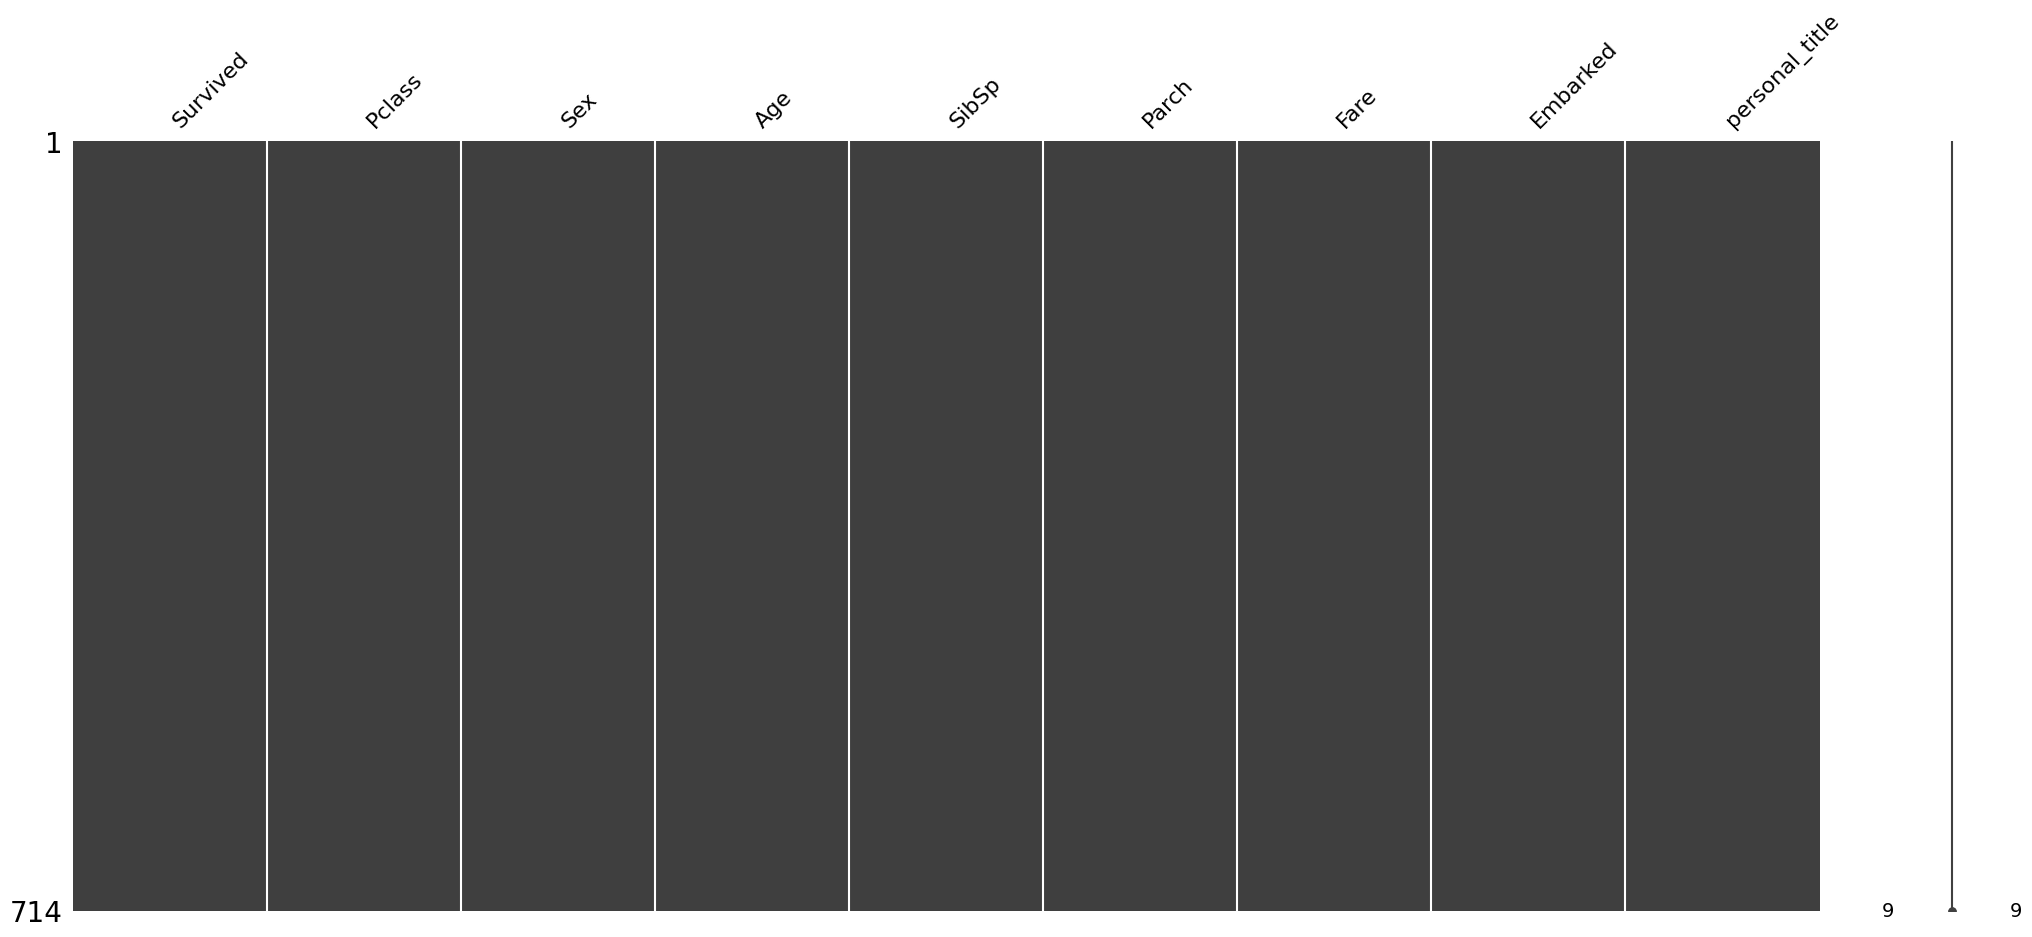

In [ ]:
df_droped=df_cat.copy()
df_droped.dropna(inplace=True)
msno.matrix(df_droped);

Define the *Target* and the *Features* vatiables

In [ ]:
target = df_droped.Survived
features = df_droped.drop ('Survived', axis=1)
discrete_features = features.dtypes==int
discrete_features

,0
Pclass,True
Sex,False
Age,False
SibSp,True
Parch,True
Fare,False
Embarked,False
personal_title,False


With the `mutual_info_classif` function, verify the dependency between the variables

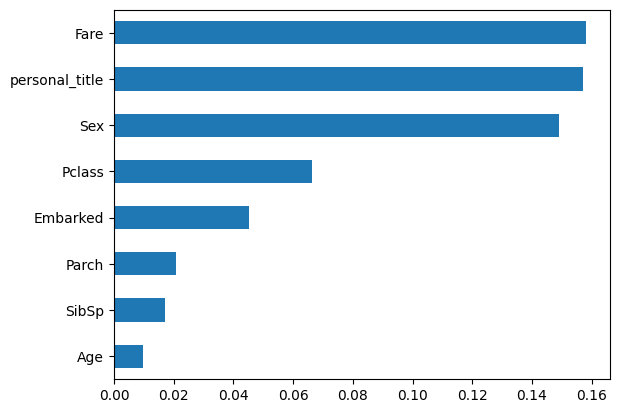

In [ ]:
scores=mutual_info_classif(X=features, y=target, discrete_features=discrete_features)
pd.Series(scores, index=features.columns).sort_values().plot.barh();